# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [3]:
# Import relavent libraries
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [4]:
# Replace 'path_to_webdriver' with the path where your WebDriver is located
driver = webdriver.Chrome()

The chromedriver version (118.0.5993.70) detected in PATH at C:\Program Files\webdrivers\chromedriver.exe might not be compatible with the detected chrome version (119.0.6045.125); currently, chromedriver 119.0.6045.105 is recommended for chrome 119.*, so it is advised to delete the driver in PATH and retry


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
driver.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
html = driver.page_source
soup = BeautifulSoup(html)

In [7]:
print(soup.prettify())

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
      <span class="fs-4">
       Mission To Mars
      </span>
     </a>
    </header>
    <div class="p-5 mb-4 bg-light rounded-3">
     <div class="container-fluid py-5">
      <h1 class="display-5 fw-bold">
       Mars Temperature Data
      </h1>
      <p class="col-md-8 fs-4">
       This is Mars data.
      </p>
      <table class="table">
       <tbody>
        <tr>
         <th>
          id
         </th>
         <th>
          terrestrial_date
     

In [8]:
df = pd.read_html(url)
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [9]:
# Extract all rows of data
table_elements = soup.find_all("tr", class_="data-row")
table_elements

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Create an empty list
data_rows = []
# Loop through the scraped data to create a list of rows
for row in table_elements:
    cell_values = row.find_all("td")
    values = []
    for value in cell_values:
        values.append(value.text)
    data_rows.append(values)

data_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data_rows, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis
mars_df["id"]= pd.to_numeric(mars_df["id"])
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df["sol"] = pd.to_numeric(mars_df["sol"])
mars_df["ls"] = pd.to_numeric(mars_df["ls"])
mars_df["month"] = pd.to_numeric(mars_df["month"])
mars_df["min_temp"] = pd.to_numeric(mars_df["min_temp"])
mars_df["pressure"] = pd.to_numeric(mars_df["pressure"])

In [14]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [20]:
# 1. How many months are there on Mars?
months = mars_df.groupby(["month"])["sol"].nunique()
months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: sol, dtype: int64

In [21]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_df["sol"].nunique()
print(f'There are {martian_days} Martian days worth of data.')

There are 1867 Martian days worth of data.


In [22]:
# 3. What is the average low temperature by month?
avg_low_temp = mars_df.groupby(["month"])["min_temp"].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Average Low Temp (C)')

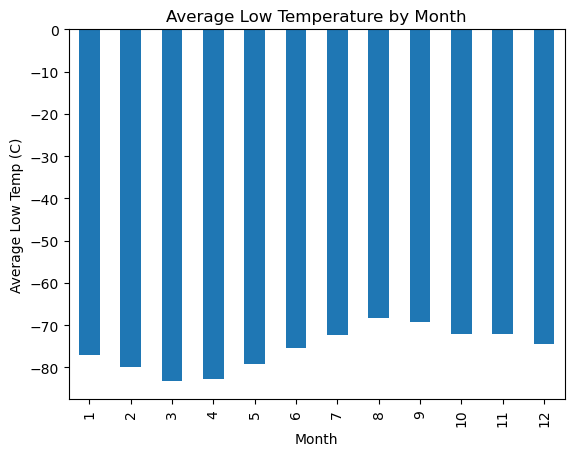

In [23]:
# Plot the average temperature by month
avg_low_temp.plot.bar()
plt.title("Average Low Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Average Low Temp (C)")

In [24]:
# Identify the coldest and hottest months in Curiosity's location (Sort df)
avg_low_temp_sorted = mars_df.groupby(["month"])["min_temp"].mean().sort_values(ascending=True)

avg_low_temp_sorted

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

Text(0, 0.5, 'Average Low Temp (C)')

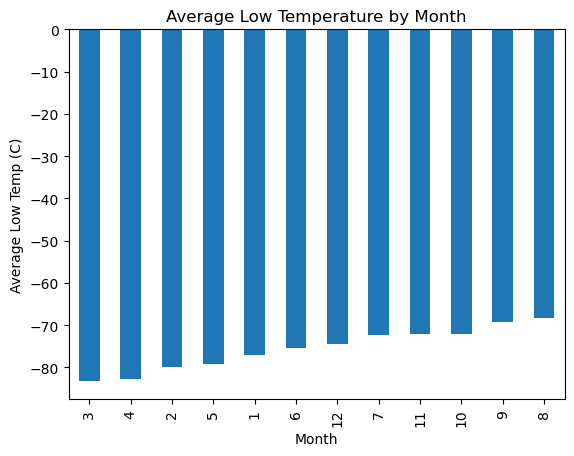

In [25]:
# Identify the coldest and hottest months in Curiosity's location
avg_low_temp_sorted.plot.bar()
plt.title("Average Low Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Average Low Temp (C)")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

In [26]:
# 4. Average pressure by Martian month
avg_pressure = mars_df.groupby(["month"])['pressure'].mean().sort_values(ascending=False)
avg_pressure

month
9     913.305970
2     889.455056
10    887.312500
3     877.322917
8     873.829787
1     862.488506
11    857.014493
12    842.156627
4     806.329897
7     795.105634
5     748.557047
6     745.054422
Name: pressure, dtype: float64

Text(0, 0.5, 'Average Atmospheric Pressure')

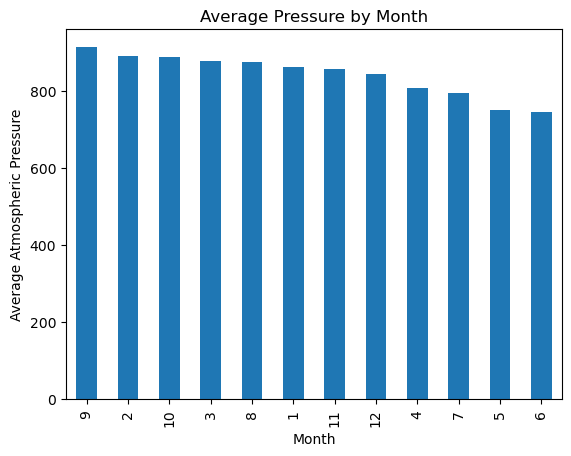

In [27]:
# Plot the average pressure by month
avg_pressure.plot.bar()
plt.title("Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Average Atmospheric Pressure")

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

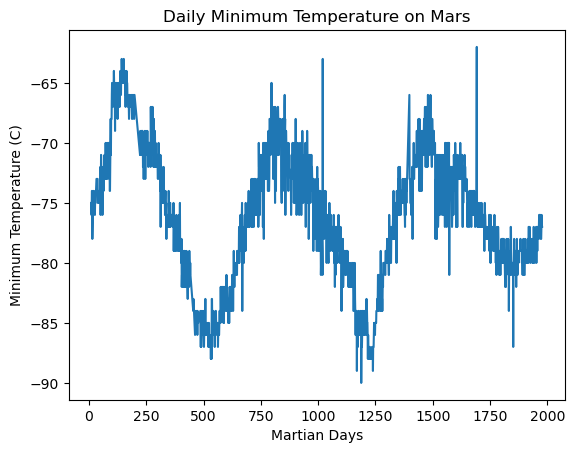

In [28]:
# 5. How many terrestrial (earth) days are there in a Martian year?
x = mars_df["sol"]
y = mars_df["min_temp"]
plt.plot(x, y)
plt.title("Daily Minimum Temperature on Mars")
plt.xlabel("Martian Days")
plt.ylabel("Minimum Temperature (C)")
plt.show()

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [29]:
# Write the data to a CSV
mars_df.to_csv('mars_weather.csv',  encoding='utf8', index=False , header=True)

In [30]:
driver.quit()